In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# When this cell is executed, the output is a zip object in memory
# The zip object packs each pair of lats and longs having the same index in their respective array
# into a tuple

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Map out how to get weather data for each city for the website
# 1. Import dependencies and initialize counters and an empty list that will hold the weather data
# 2. Loop through the cities list
# 3. Group the cities in set of 50 to log the process as weather data is found for each city
    # Two counters will be needed: one to log the city count from 1 to 50 and another for the sets
# 4. Build the city_url or endpoint for each city
# 5. Log the URL and the record and set numbers
# 6. Make an API request for each city
# 7. Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame

In [8]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d58cec1399a9bffb48701a67c798162c


In [10]:
# Import the datetime module from the datetime library
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning of data retrieval          ")
print("-------------------------------------")

# Create the counters and initialize to 1 because the first iteration of logging for each recorded response and
# the set needs to start at 1
record_count = 1
set_count = 1


# Every time a city is referenced in the code, the index on the cities list needs to be used
# This will cause programming errors when building city_url because it adds to the index, not the city name to
# city_url
# To fix this issue, another for loop needs to be created in order to the city from the cities list
# Instead of using two for loops, use the enumerate() method as an alternative way to iterate through the list 
# of cities and retrieve both the index and city from the list

# Loop through the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Add a try-except block to prevent API requests from stopping prematurelyy if the city_weather requests is 
# not a valuid request
# If the request isn't valid, the code ill not find the first item requested, which is the dictionary "coord"
# The code will skip the city and continue to run

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information to the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is given, skip the city
    except:
        print("City not found.  Skipping...")
        pass
    
# Indicate the date loading is complete
print("------------------------------")
print("Date retrieval complete       ")
print("------------------------------")

Beginning of data retrieval          
-------------------------------------
Processing Record 1 of Set 1 | san jeronimo
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | tsihombe
City not found.  Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | la romana
Processing Record 17 of Set 1 | montrose
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of S

Processing Record 34 of Set 4 | lloydminster
Processing Record 35 of Set 4 | balad
Processing Record 36 of Set 4 | akyab
Processing Record 37 of Set 4 | guanica
Processing Record 38 of Set 4 | miyang
Processing Record 39 of Set 4 | leh
Processing Record 40 of Set 4 | kamenz
Processing Record 41 of Set 4 | kununurra
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | puerto colombia
Processing Record 44 of Set 4 | mwinilunga
Processing Record 45 of Set 4 | pesqueira
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | sabha
Processing Record 48 of Set 4 | chitrakonda
Processing Record 49 of Set 4 | noumea
Processing Record 50 of Set 4 | attawapiskat
City not found.  Skipping...
Processing Record 1 of Set 5 | novyy urengoy
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | turukhansk
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7

Processing Record 27 of Set 8 | mayskiy
Processing Record 28 of Set 8 | caravelas
Processing Record 29 of Set 8 | sioux lookout
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | george
Processing Record 33 of Set 8 | mahon
Processing Record 34 of Set 8 | sept-iles
Processing Record 35 of Set 8 | bara
Processing Record 36 of Set 8 | bulgan
Processing Record 37 of Set 8 | marsabit
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | toliary
City not found.  Skipping...
Processing Record 40 of Set 8 | maniwaki
Processing Record 41 of Set 8 | boulder city
Processing Record 42 of Set 8 | qibili
City not found.  Skipping...
Processing Record 43 of Set 8 | tahta
Processing Record 44 of Set 8 | longyearbyen
Processing Record 45 of Set 8 | chumikan
Processing Record 46 of Set 8 | glendive
Processing Record 47 of Set 8 | luderitz
Processing Record 48 of Set 8 | matagami
Processing Record 49 of Set 8 | tahe
Proces

Processing Record 21 of Set 12 | gornyy
Processing Record 22 of Set 12 | sao joao da barra
Processing Record 23 of Set 12 | singaparna
Processing Record 24 of Set 12 | livramento
Processing Record 25 of Set 12 | chokwe
Processing Record 26 of Set 12 | sambava
Processing Record 27 of Set 12 | ardakan
Processing Record 28 of Set 12 | zhanatas
City not found.  Skipping...
Processing Record 29 of Set 12 | show low
Processing Record 30 of Set 12 | goias
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | chelmza
Processing Record 33 of Set 12 | san jose
Processing Record 34 of Set 12 | zyryanka
Processing Record 35 of Set 12 | saint andrews
Processing Record 36 of Set 12 | elko
Processing Record 37 of Set 12 | skjervoy
Processing Record 38 of Set 12 | batagay
Processing Record 39 of Set 12 | lerwick
Processing Record 40 of Set 12 | portland
Processing Record 41 of Set 12 | usinsk
Processing Record 42 of Set 12 | areosa
Processing Record 43 of Set 12 | slave lake
Processin

In [17]:
# Print the city count to confirm sufficient count.
len(cities)

612

In [21]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jeronimo,-11.9472,-75.2829,61.74,48,92,5.93,PE,2021-01-10 19:28:20
1,Kapaa,22.0752,-159.3190,71.60,94,40,3.44,US,2021-01-10 19:23:34
2,Ushuaia,-54.8000,-68.3000,46.40,81,75,25.32,AR,2021-01-10 19:28:20
3,Rikitea,-23.1203,-134.9692,77.72,77,94,15.12,PF,2021-01-10 19:28:20
4,Clyde River,70.4692,-68.5914,5.00,85,75,17.27,CA,2021-01-10 19:28:20
5,Thompson,55.7435,-97.8558,17.60,93,75,4.61,CA,2021-01-10 19:28:21
6,Sao Filipe,14.8961,-24.4956,72.10,69,100,18.72,CV,2021-01-10 19:28:21
7,Tasiilaq,65.6145,-37.6368,19.40,49,90,4.41,GL,2021-01-10 19:28:21
8,Te Anau,-45.4167,167.7167,48.43,86,48,0.54,NZ,2021-01-10 19:27:34
9,Punta Arenas,-53.1500,-70.9167,48.20,76,75,13.80,CL,2021-01-10 19:25:09


In [23]:
for col in city_data_df.columns:
    print(col)

City
Lat
Lng
Max Temp
Humidity
Cloudiness
Wind Speed
Country
Date


In [27]:
# Reorder the columns so they are easier to read in this order:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jeronimo,PE,2021-01-10 19:28:20,-11.9472,-75.2829,61.74,48,92,5.93
1,Kapaa,US,2021-01-10 19:23:34,22.0752,-159.3190,71.60,94,40,3.44
2,Ushuaia,AR,2021-01-10 19:28:20,-54.8000,-68.3000,46.40,81,75,25.32
3,Rikitea,PF,2021-01-10 19:28:20,-23.1203,-134.9692,77.72,77,94,15.12
4,Clyde River,CA,2021-01-10 19:28:20,70.4692,-68.5914,5.00,85,75,17.27
5,Thompson,CA,2021-01-10 19:28:21,55.7435,-97.8558,17.60,93,75,4.61
6,Sao Filipe,CV,2021-01-10 19:28:21,14.8961,-24.4956,72.10,69,100,18.72
7,Tasiilaq,GL,2021-01-10 19:28:21,65.6145,-37.6368,19.40,49,90,4.41
8,Te Anau,NZ,2021-01-10 19:27:34,-45.4167,167.7167,48.43,86,48,0.54
9,Punta Arenas,CL,2021-01-10 19:25:09,-53.1500,-70.9167,48.20,76,75,13.80


In [28]:
# Create the CSV output file
output_data_file = "weather_data/cities.csv"

# Export city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

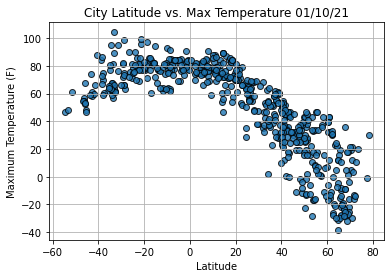

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

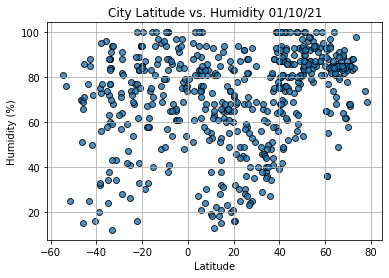

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

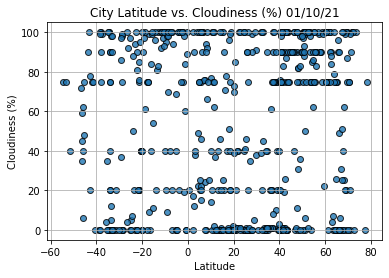

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

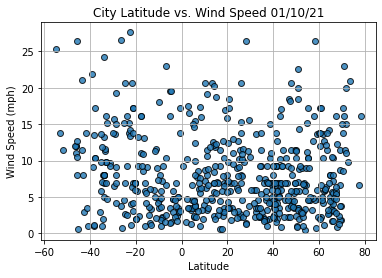

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()